<a href="https://colab.research.google.com/github/data602sps/assignments/blob/master/05_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 8**

# **Weeks 10 & 11- matplotlib & seaborn**
* In this homework assignment, you will explore and analyze a public dataset of your choosing. Since this assignment is “open-ended” in nature, you are free to expand upon the requirements below. However, you must meet the minimum requirments as indicated in each section.


* The preferred method for this analysis is in a .ipynb file. Feel free to use whichever platform of your choosing.  


### **Some data examples:**
•	https://www.data.gov/

•	https://opendata.cityofnewyork.us/

•	https://datasetsearch.research.google.com/

•	https://archive.ics.uci.edu/ml/index.php

### **Resources:**

•	https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html

•	https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html

•	https://www.data-to-viz.com/



### **Headings or comments**
**You are required to make use of comments, or headings for each section.  You must explain what your code is doing, and the results of running your code.**  Act as if you were giving this assignment to your manager - you must include clear and descriptive information for each section.

### **You may work as a group or indivdually on this assignment.**


# Introduction

In this section, please describe the dataset you are using.  Include a link to the source of this data.  You should also provide some explanation on why you choose this dataset.

# NYC Trees Dataset (2015): A Brief Summary

The 2015 NYC Tree Census, also known as "TreesCount! 2015", is a comprehensive inventory of street trees across all five boroughs of New York City. This citizen science initiative was the third decennial tree census conducted by NYC Parks & Recreation in partnership with volunteers and staff.

## Dataset Highlights

- **Size**: Contains records of approximately 680,000 street trees
- **Geographic Coverage**: All five NYC boroughs (Manhattan, Brooklyn, Queens, Bronx, Staten Island)
- **Collection Period**: 2015-2016

## Key Variables

- **Tree Species**: Over 130 species identified with scientific and common names
- **Tree Measurements**: Diameter at breast height (DBH), indicating tree size and age
- **Tree Health**: Assessments categorized as "Good", "Fair", "Poor", or "Dead"
- **Location Data**: Precise geospatial coordinates, street address, and borough information
- **Site Characteristics**: Presence of guards, stewardship signs, tree pits, and sidewalk damage

## Research Applications

This dataset enables analysis of urban forestry distribution, biodiversity patterns, environmental equity, and the relationship between tree health and various urban factors. It serves as a valuable resource for urban planners, environmental scientists, and community organizations working on green infrastructure initiatives.

## Accessing the Data

We've downloaded the data from the [Tree Census website](https://data.cityofnewyork.us/Environment/2015-Street-Tree-Census-Tree-Data/uvpi-gqnh/data_preview) as a CSV file to work with locally.

______________
# Data Exploration
Import your dataset into your .ipynb, create dataframes, and explore your data.  

Include:

* Summary statistics means, medians, quartiles,
* Missing value information
* Any other relevant information about the dataset.  



In [57]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# The magic commands above do the following:
# 1. %load_ext autoreload - Loads the autoreload extension
# 2. %autoreload 2 - Automatically reloads all modules before executing code
# 3. %matplotlib inline - Displays matplotlib plots inline in the notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df = pd.read_csv(Path("2015_Street_Tree_Census_-_Tree_Data_20250308.csv"))

df.describe(include="all")

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
count,683788.000000,683788.000000,683788,683788.000000,683788.000000,683788,683788,652172,652169,652169,...,6.837880e+05,683788,683788.000000,683788.000000,6.837880e+05,683788.000000,677269.000000,677269.000000,6.742290e+05,6.742290e+05
unique,NaN,NaN,483,NaN,NaN,2,3,3,132,132,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,10/27/2015,NaN,NaN,OnCurb,Alive,Good,Platanus x acerifolia,London planetree,...,NaN,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6852,NaN,NaN,656896,652173,528850,87014,87014,...,NaN,683788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,365205.011085,313793.096236,NaN,11.279787,0.432463,NaN,NaN,NaN,NaN,NaN,...,3.404914e+06,NaN,40.701261,-73.924060,1.005280e+06,194798.424625,30.027330,11957.368422,3.495439e+06,3.413414e+09
std,208122.092902,114839.024312,NaN,8.723042,3.290241,NaN,NaN,NaN,NaN,NaN,...,1.175863e+06,NaN,0.090311,0.123583,3.428505e+04,32902.061114,14.301717,30745.739811,1.193275e+06,1.174892e+09
min,3.000000,100002.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,...,1.000201e+06,NaN,40.498466,-74.254965,9.133493e+05,120973.792200,1.000000,1.000000,1.000000e+06,0.000000e+00
25%,186582.750000,221556.000000,NaN,4.000000,0.000000,NaN,NaN,NaN,NaN,NaN,...,3.011700e+06,NaN,40.631928,-73.980500,9.896578e+05,169515.153700,19.000000,202.000000,3.031991e+06,3.011240e+09
50%,366214.500000,319967.000000,NaN,9.000000,0.000000,NaN,NaN,NaN,NaN,NaN,...,4.008100e+06,NaN,40.700612,-73.912911,1.008386e+06,194560.252500,30.000000,516.000000,4.020352e+06,4.008560e+09
75%,546170.250000,404624.000000,NaN,16.000000,0.000000,NaN,NaN,NaN,NaN,NaN,...,4.103202e+06,NaN,40.762228,-73.834910,1.029991e+06,217019.571950,43.000000,1417.000000,4.263123e+06,4.105700e+09


In [60]:
df.shape

(683788, 45)

In [61]:
df.duplicated().sum()

np.int64(0)

In [62]:
# Some features are not populated for dead or stump trees

df.isna().sum()

tree_id                  0
block_id                 0
created_at               0
tree_dbh                 0
stump_diam               0
curb_loc                 0
status                   0
health               31616
spc_latin            31619
spc_common           31619
steward             519438
guards              603922
sidewalk             31616
user_type                0
problems            457944
root_stone               0
root_grate               0
root_other               0
trunk_wire               0
trnk_light               0
trnk_other               0
brch_light               0
brch_shoe                0
brch_other               0
address                  0
postcode                 0
zip_city                 0
community board          0
borocode                 0
borough                  0
cncldist                 0
st_assem                 0
st_senate                0
nta                      0
nta_name                 0
boro_ct                  0
state                    0
l

In [63]:
df.columns

Index(['tree_id', 'block_id', 'created_at', 'tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward',
       'guards', 'sidewalk', 'user_type', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other', 'address', 'postcode',
       'zip_city', 'community board', 'borocode', 'borough', 'cncldist',
       'st_assem', 'st_senate', 'nta', 'nta_name', 'boro_ct', 'state',
       'latitude', 'longitude', 'x_sp', 'y_sp', 'council district',
       'census tract', 'bin', 'bbl'],
      dtype='object')

In [ ]:
cols_of_interest = [
    "tree_id",
    "block_id",
    "tree_dbh",  # Tree diameter
    "stump_diam",  # Stump diameter
    "status",  # Alive, stump, dead
    "health",  # Good, fair, poor
    "spc_common",  # Species
    "problems",  # Aggregate of all problems
    "address",
    "latitude",
    "longitude",
    "borough",
]

df = df[cols_of_interest]

# Data Wrangling

Perform data wrangling.  You are free to use your best judgment here.  If you are stuck, look at previous assignment.

This dataset is actually quite well maintained and requires little wrangling. As described above, some columns are intentionally left empty when not applicable (for stumps and dead trees primarily). We did not find any duplicate rows either. We will instead focus primarily on the visualizations.

# Visualizations

The main purpose of this assignment is to practice creating various visualizations using the matplotlib and seaborn library.

### **Part 1:**
Using matplotlib, create ***two or more plots*** that incorporate at least **5** of the following properties:

Note: these properties vary based on your data.  The goal is to practice creating visualizations and modifying its properties.

*   Use and change a legend position
*   Change a legend font size
*   Place a legend outside of the plot
*   Create a single legend for all subplots
*   Change the title and x/y labels
*   Change the marker, line colors, and line width
*   Add annotations
*   Modify Axis Text Ticks/Labels
*   Change size of axis Labels
*   Your own choice not included above


Plots that you can create **include**:

*   Scatter Plot
*   Bar plot
*   Line Chart
*   Multi Plots (e.g. using .subplot()
*   Histogram

You can add another plot not listed here if it works better for your data.  This is not a complete list of plots to create.

### **Part 2:**

Recreate the visualizations above using the Seaborn library as best as possible.  


**You are required to explain what each of your plots is representing. Plots without comments will not be accepted.**  In addition, please explain the properties you are showcasing.


### **Part 3:**
In a comment or text box, explain the differences between creating a plot in matplotlib and seaborn, based on your above plots.



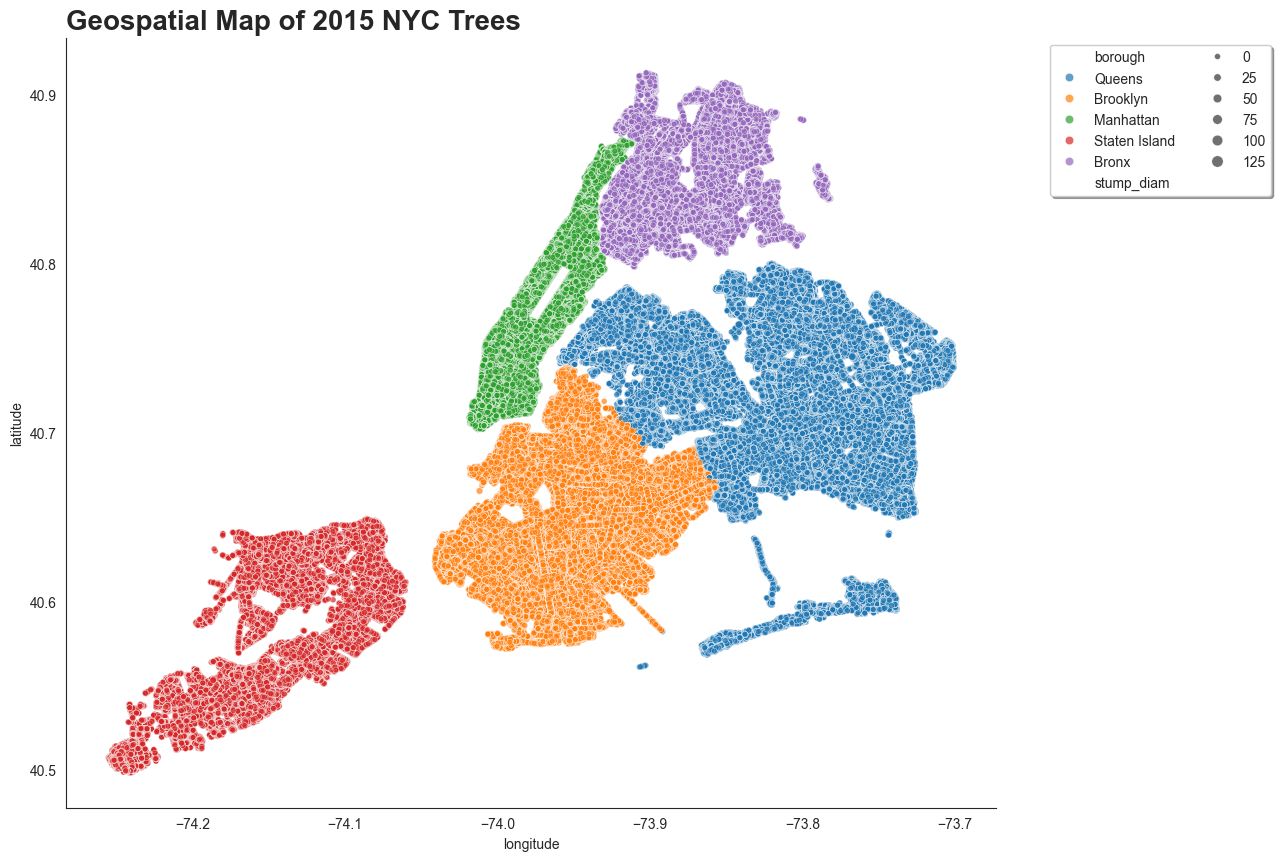

In [ ]:
plt.subplots(figsize=(12, 10))
sns.set_style("white")
sns.scatterplot(
    df, x="longitude", y="latitude", hue="borough", size="stump_diam", alpha=0.7
)

plt.title("Geospatial Map of 2015 NYC Trees", loc="left", weight="bold", size="20")
# plt.xticks([40.4, 40.5, 40.6, 40.7, 40.8, 40.9, 41.0])
# TODO adjust legend so it fits both
plt.legend(fontsize="medium")
plt.gca().legend(
    loc="upper left", bbox_to_anchor=(1.05, 1), fancybox=True, shadow=True, ncol=2
)
sns.despine()

<Axes: xlabel='health', ylabel='count'>

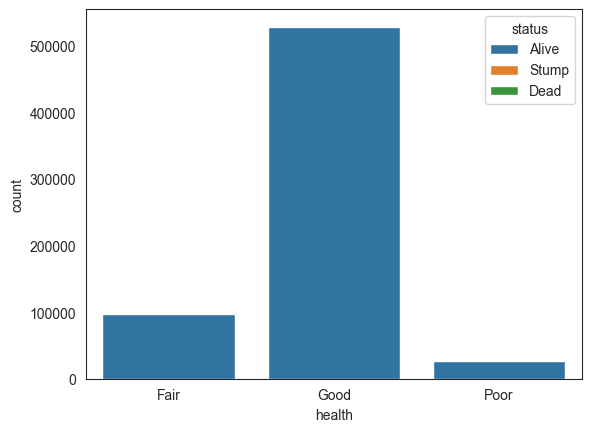

In [75]:
sns.countplot(df, x="health", hue="status")


# Conclusions  

After exploring your dataset, provide a short summary of what you noticed from this dataset.  